# Project Topic :

```
Prediction of Marketing Campaign
```



In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
# Turning off warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset (training data)
# Importing dataset
train = pd.read_csv("marketing_trn_data.csv")

In [ ]:
# View the dataset
train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,"$28,691.00",1,0,7/4/13,56,4,5,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,"$39,665.00",1,0,5/25/13,97,31,127,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,"$69,283.00",0,1,6/14/14,41,8,674,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,"$33,581.00",2,0,1/8/13,38,1,11,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,"$72,354.00",0,0,4/17/13,67,182,315,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,"$77,598.00",0,0,10/1/13,53,33,1193,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,"$62,670.00",0,1,2/2/14,57,38,539,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,"$44,953.00",0,0,12/21/12,31,124,728,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,"$27,469.00",0,0,8/2/12,2,0,9,...,0,0,0,3,6,0,0,0,0,0


In [ ]:
labels = pd.read_csv("marketing_trn_class_labels.csv", header = None)
labels

,0,1
0,d1,0
1,d2,0
2,d3,0
3,d4,0
4,d5,0
...,...,...
2011,d2012,0
2012,d2013,0
2013,d2014,0
2014,d2015,0


Target variable be the **response**. Latest campaign 1 performance if the latest campaign is success, 0 if failure.

## Data-Cleaning

In [ ]:
# Removing column names that contain whitespace
train.columns = train.columns.str.replace(' ', '')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2016 non-null   int64  
 1   Education            2016 non-null   object 
 2   Marital_Status       2016 non-null   object 
 3   Income               1995 non-null   float64
 4   Kidhome              2016 non-null   int64  
 5   Teenhome             2016 non-null   int64  
 6   Dt_Customer          2016 non-null   object 
 7   Recency              2016 non-null   int64  
 8   MntGoldProds         2016 non-null   int64  
 9   MntWines             2016 non-null   int64  
 10  MntFruits            2016 non-null   int64  
 11  MntFishProducts      2016 non-null   int64  
 12  MntSweetProducts     2016 non-null   int64  
 13  MntMeatProducts      2016 non-null   int64  
 14  NumDealsPurchases    2016 non-null   int64  
 15  NumWebPurchases      2016 non-null   i

In [ ]:
# Checking for the null values
train.isnull().sum()
# Assigning null values to be the median of the column
train=train.fillna(train.median())

In [ ]:
train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,28691.0,1,0,7/4/13,56,4,5,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,39665.0,1,0,5/25/13,97,31,127,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,69283.0,0,1,6/14/14,41,8,674,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,33581.0,2,0,1/8/13,38,1,11,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,72354.0,0,0,4/17/13,67,182,315,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,77598.0,0,0,10/1/13,53,33,1193,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,62670.0,0,1,2/2/14,57,38,539,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,44953.0,0,0,12/21/12,31,124,728,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,27469.0,0,0,8/2/12,2,0,9,...,0,0,0,3,6,0,0,0,0,0


## Feature Engineering

In [ ]:
train['Dt_Customer'] = pd.to_datetime(train['Dt_Customer'])

In [ ]:
train.rename(columns = {'Year_Birth':'Age'}, inplace = True)
train['Age'] = train.Age.apply(lambda x: 2023-x)

In [ ]:
# Performing feature engineering.
train['Children'] = train['Kidhome'] + train['Teenhome']
train = train.drop(['Kidhome', 'Teenhome'], axis = 1)

In [ ]:
# Total number of days since enrollment of a customer with the company.
from datetime import date
train.rename(columns = {'Dt_Customer':'TotalEnrollDays'}, inplace = True)
train['TotalEnrollDays'] = pd.to_datetime(date.today()) - train['TotalEnrollDays']
train['TotalEnrollDays'] = [int(str(train['TotalEnrollDays'][x])[:4]) for x in train.index]

In [ ]:
# The total amount spend in the last 2 years.
mnt_col = [i for i in train.columns if 'Mnt' in i]
train['TotalMnt'] = train[mnt_col].sum(axis=1)

In [ ]:
# The total number of purchases made.
purchase_col = [j for j in train.columns if 'Purchase' in j]
train['TotalPurchase'] = train[purchase_col].sum(axis=1)

# The total campaigns in which customer accepted the offer.
campaigns_col = [c for c in train.columns if 'Cmp' in c]
train['TotalCampaignsAcc'] = train[campaigns_col].sum(axis=1)

In [ ]:
# View the customer ID with new features.
train[['Age', 'Children', 'TotalEnrollDays', 'TotalMnt', 'TotalPurchase', 'TotalCampaignsAcc']]

,Age,Children,TotalEnrollDays,TotalMnt,TotalPurchase,TotalCampaignsAcc
0,34,1,3571,34,5,0
1,42,1,3611,216,12,1
2,48,1,3226,904,27,0
3,54,2,3748,17,4,0
4,30,0,3649,1228,19,0
...,...,...,...,...,...,...
2011,80,0,3482,1735,26,1
2012,69,1,3358,825,22,0
2013,42,0,3766,1021,24,1
2014,76,0,3907,17,4,0


In [ ]:
train = train[['Age', 'Education', 'Marital_Status', 'Income', 'Children', 'TotalEnrollDays', 'Recency', 'MntGoldProds', 'MntWines',
         'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts', 'TotalMnt', 'NumDealsPurchases',
         'NumWebPurchases', 'NumCatalogPurchases', 'TotalPurchase', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
         'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'TotalCampaignsAcc', 'Complain']]

In [ ]:
print(train['Education'].unique())
print(train['Marital_Status'].unique())

['Graduation' 'PhD' 'Basic' 'Master' '2n Cycle']
['Married' 'Together' 'Single' 'Divorced' 'Widow' 'Alone' 'YOLO' 'Absurd']


## One Hot Encoder

In [ ]:
one_hot_encoded = pd.get_dummies(train, columns = ['Education', 'Marital_Status'])
one_hot_encoded = one_hot_encoded.astype(float)
one_hot_encoded

,Age,Income,Children,TotalEnrollDays,Recency,MntGoldProds,MntWines,MntFruits,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,34.0,28691.0,1.0,3571.0,56.0,4.0,5.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,42.0,39665.0,1.0,3611.0,97.0,31.0,127.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,48.0,69283.0,1.0,3226.0,41.0,8.0,674.0,62.0,0.0,26.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,54.0,33581.0,2.0,3748.0,38.0,1.0,11.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,30.0,72354.0,0.0,3649.0,67.0,182.0,315.0,26.0,220.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,80.0,77598.0,0.0,3482.0,53.0,33.0,1193.0,33.0,129.0,66.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012,69.0,62670.0,1.0,3358.0,57.0,38.0,539.0,30.0,80.0,46.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013,42.0,44953.0,0.0,3766.0,31.0,124.0,728.0,17.0,11.0,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2014,76.0,27469.0,0.0,3907.0,2.0,0.0,9.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
import time
import joblib,  statistics

In [ ]:
class_names = list(Counter(labels[1]).keys())
class_names = [str(x) for x in class_names]
print('\n The classes are: ')
print(class_names)


 The classes are: 
['0', '1']


Using Machine Learning Classifiers

Decision Tree Classifier

In [ ]:
from sklearn import tree
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(one_hot_encoded, labels[1])

DecisionTreeClassifier(random_state=0)

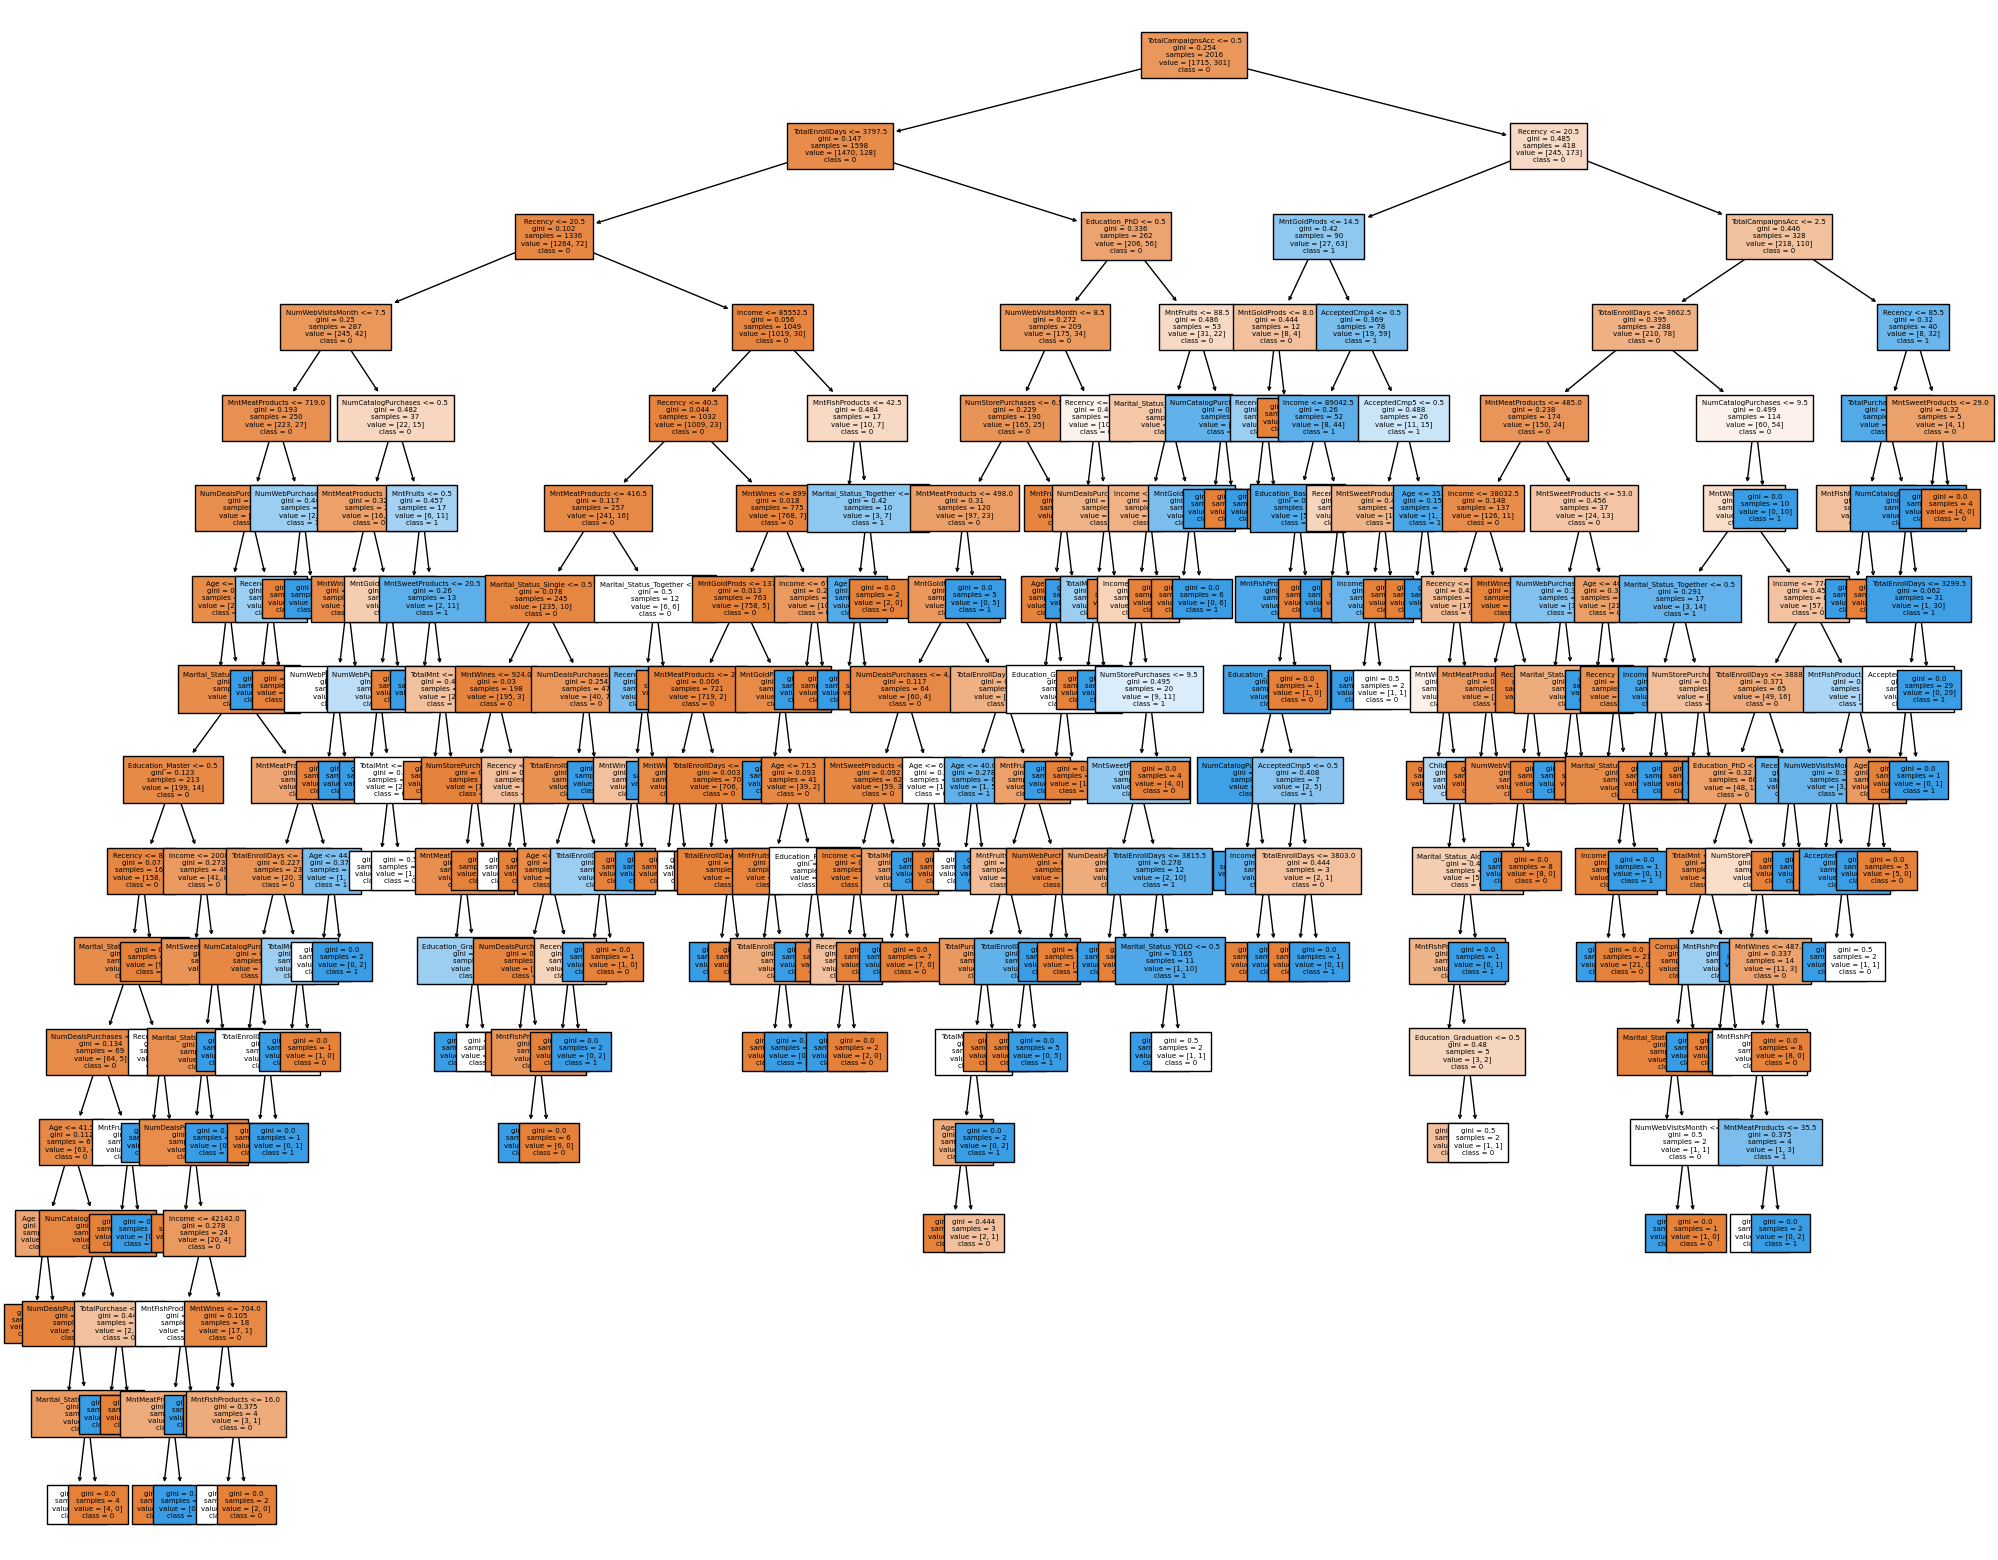

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=one_hot_encoded.columns,
                   class_names=class_names,
                   filled=True, fontsize = 5)

6 relevant features (i.e., 'TotalCampaignsAcc', 'TotalEnrollDays', 'Recency', 'Education_PhD', 'MntGoldProds', 'Income') which are at the top of decision tree has been selected for building the models.

In [ ]:
columns = ['TotalCampaignsAcc', 'TotalEnrollDays', 'Recency', 'Education_PhD', 'MntGoldProds', 'Income']
train = one_hot_encoded[columns]
train

,TotalCampaignsAcc,TotalEnrollDays,Recency,Education_PhD,MntGoldProds,Income
0,0.0,3571.0,56.0,0.0,4.0,28691.0
1,1.0,3611.0,97.0,1.0,31.0,39665.0
2,0.0,3226.0,41.0,1.0,8.0,69283.0
3,0.0,3748.0,38.0,1.0,1.0,33581.0
4,0.0,3649.0,67.0,0.0,182.0,72354.0
...,...,...,...,...,...,...
2011,1.0,3482.0,53.0,0.0,33.0,77598.0
2012,0.0,3358.0,57.0,1.0,38.0,62670.0
2013,1.0,3766.0,31.0,1.0,124.0,44953.0
2014,0.0,3907.0,2.0,0.0,0.0,27469.0


In [ ]:
# Training and cross validation set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split((train), labels[1], test_size = 0.20, random_state = 42,stratify = labels[1])

from collections import Counter
Y_train = [str(x) for x in Y_train]
print('\n Training Data Class  Names:\t['+','.join(list(Counter(Y_train).keys()))+']\n')
clas_labels = [str(x) for  x in list(Counter(Y_train).values())]
print(' Instances in Individual Classes: '+','.join(clas_labels))

Y_test = [str(x) for x in Y_test]
print('\n Test Data Class  Names:\t['+','.join(list(Counter(Y_test).keys()))+']\n')
clas_labels = [str(x) for  x in list(Counter(Y_test).values())]
print(' Instances in Individual Classes: '+','.join(clas_labels))


 Training Data Class  Names:	[0,1]

 Instances in Individual Classes: 1371,241

 Test Data Class  Names:	[0,1]

 Instances in Individual Classes: 344,60


In [ ]:
class data_classification():
    def __init__(self, clf_opt='lr', para_tune_tech='grid'):
        self.clf_opt = clf_opt
        self.para_tune_tech = para_tune_tech

    # Selection of classifiers
    def classification_pipeline(self):
    # Decision Tree
        if self.clf_opt=='dt':
            print('Training Decision Tree Classifier \n')
            clf = DecisionTreeClassifier(random_state=40)
            clf_parameters = {
                'criterion':('gini', 'entropy'),
                'max_features':('auto', 'sqrt', 'log2'),
                'max_depth':(150,200,250,500),
                'ccp_alpha':(0.001,0.002,0.003,0.004)
            }
    # Logistic Regression
        elif self.clf_opt=='lr':
            print(' Training Logistic Regression Classifier')
            clf = LogisticRegression(solver='liblinear',class_weight='balanced')
            clf_parameters = {
                'random_state':(0,10),
                'max_iter':(750,850,1500),
                'multi_class':('auto', 'ovr'),
                'penalty':('l1', 'l2', 'elasticnet', 'none')
            }
    # Multinomial Naive Bayes
        elif self.clf_opt=='nb':
            print('Training Multinomial Naive Bayes Classifier')
            clf = MultinomialNB(fit_prior=True, class_prior=None)
            clf_parameters = {
#                 'alpha':(0,1),
                'alpha':(0.001,0.01,0.1,0.5),
            }
             # Support Vector Machine
        elif self.clf_opt=='svm':
            print('\n\t### Training SVM Classifier ### \n')
            clf = svm.SVC(class_weight='balanced', probability=True)
            clf_parameters = {
                'C':(0.001,0.1,1),
                'kernel':('linear', 'rbf','poly','sigmoid'),
            }
    # Random Forest
        elif self.clf_opt=='rf':
            print('Training Random Forest Classifier')
            clf = RandomForestClassifier(max_features=None,class_weight='balanced')
            clf_parameters = {
                'criterion':('entropy','gini'),
                'n_estimators':(30,50,100,120),
#                 'max_depth':(10,20,30,50,100,None),
                'max_depth':(80,150,200,250, None),
                'max_features':('auto', 'sqrt', 'log2', None)
            }
    # k-Nearest Neighbors
        elif self.clf_opt=='knn':
            print(' Training k-nearest Neighbor Classifier')
            clf = KNeighborsClassifier()
            clf_parameters = {
#                 'n_neighbors':(5,10,15,20),
                'n_neighbors':(25,50,75,100),
                'weights':('uniform', 'distance'),
                'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
#                 'leaf_size':(10,20,50,100)
                'leaf_size':(25,75,200,500)
            }
            # AdaBoost
        if self.clf_opt=='ab':
            print('\n\t### Training AdaBoost Classifier ### \n')
#             be1 = svm.SVC(kernel='linear', class_weight='balanced',probability=True)
            be1 = svm.SVC(kernel='rbf', C= 1, class_weight='balanced',probability=True)
#             be2 = LogisticRegression(solver='liblinear',class_weight='balanced')
            be2 = LogisticRegression(solver='liblinear',class_weight='balanced',max_iter=500,multi_class='ovr')
#             be3 = DecisionTreeClassifier(max_depth=50)
            be3 = DecisionTreeClassifier(max_depth=150,ccp_alpha=0.00001)
#             clf = AdaBoostClassifier(algorithm='SAMME',n_estimators=100)
            clf = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100)
            clf_parameters = {
                'base_estimator':(be1,be2,be3,None),
                'random_state':(0,10),
            }
        else:
            print('Select a valid classifier \n')
        return clf,clf_parameters

    def classification(self,X_train, X_test, Y_train, Y_test):
        clf,clf_parameters = self.classification_pipeline()
    # Grid Search
        if self.para_tune_tech=='grid':
            tech = GridSearchCV(clf, clf_parameters, scoring='accuracy', cv=10)
            tech.fit(X_train, Y_train)
            clf = tech.best_estimator_
            print('\n\n The best set of parameters of the pipiline are: ')
            print(clf)
            predicted = clf.predict(X_test)
    # Random Search
        elif self.para_tune_tech=='random':
            tech = RandomizedSearchCV(clf, clf_parameters, scoring = 'accuracy', cv=10)
            tech.fit(X_train, Y_train)
            clf = tech.best_estimator_
            print('\n\n The best set of parameters of the pipiline are: ')
            print(clf)
            predicted = clf.predict(X_test)
        else:
            print('Select a valid parameter tuning technique\n')

    # Evaluation
        class_names=list(Counter(Y_test).keys())
        class_names = [str(x) for x in class_names]
        print('\n The classes are: ')
        print(class_names)
    # Evaluation
        print('\n *************** Confusion Matrix ***************  \n')
        print (confusion_matrix(Y_test, predicted))
        print('\n ***************  Scores on Test Data  *************** \n ')
        print(classification_report(Y_test, predicted, target_names=class_names))

 Multinomial Naive Bayes Classifier using grid search

In [ ]:
start = time.time()
clf = data_classification(clf_opt='nb', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")

Training Multinomial Naive Bayes Classifier
Select a valid classifier 



 The best set of parameters of the pipiline are: 
MultinomialNB(alpha=0.001)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[214 130]
 [ 22  38]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       344
           1       0.23      0.63      0.33        60

    accuracy                           0.62       404
   macro avg       0.57      0.63      0.54       404
weighted avg       0.81      0.62      0.68       404

The time of execution of above program is : 0.004110618432362875 min


Multinomial Naive Bayes classifier using Random Search

In [ ]:
start = time.time()
clf = data_classification(clf_opt='nb', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")

Training Multinomial Naive Bayes Classifier
Select a valid classifier 



 The best set of parameters of the pipiline are: 
MultinomialNB(alpha=0.001)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[214 130]
 [ 22  38]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       344
           1       0.23      0.63      0.33        60

    accuracy                           0.62       404
   macro avg       0.57      0.63      0.54       404
weighted avg       0.81      0.62      0.68       404

The time of execution of above program is : 0.0038130839665730795 min


 Logistic Regression Classifier using grid search

In [ ]:
start = time.time()
clf = data_classification(clf_opt='lr', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start), "sec")

 Training Logistic Regression Classifier
Select a valid classifier 



 The best set of parameters of the pipiline are: 
LogisticRegression(class_weight='balanced', max_iter=750, penalty='l1',
                   random_state=10, solver='liblinear')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[280  64]
 [ 13  47]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       344
           1       0.42      0.78      0.55        60

    accuracy                           0.81       404
   macro avg       0.69      0.80      0.71       404
weighted avg       0.88      0.81      0.83       404

The time of execution of above program is : 13.615371465682983 sec


Logistic Regression Classifier using Random Search

In [ ]:
start = time.time()
clf = data_classification(clf_opt='lr', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start), "sec")

 Training Logistic Regression Classifier
Select a valid classifier 



 The best set of parameters of the pipiline are: 
LogisticRegression(class_weight='balanced', max_iter=1500, multi_class='ovr',
                   penalty='l1', random_state=10, solver='liblinear')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[280  64]
 [ 13  47]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       344
           1       0.42      0.78      0.55        60

    accuracy                           0.81       404
   macro avg       0.69      0.80      0.71       404
weighted avg       0.88      0.81      0.83       404

The time of execution of above program is : 2.2761118412017822 sec


 Decision Tree Classifier using grid search

In [ ]:
start = time.time()
clf = data_classification(clf_opt='dt', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start), "sec")

Training Decision Tree Classifier 

Select a valid classifier 



 The best set of parameters of the pipiline are: 
DecisionTreeClassifier(ccp_alpha=0.002, max_depth=150, max_features='auto',
                       random_state=40)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[341   3]
 [ 41  19]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       344
           1       0.86      0.32      0.46        60

    accuracy                           0.89       404
   macro avg       0.88      0.65      0.70       404
weighted avg       0.89      0.89      0.87       404

The time of execution of above program is : 6.648347854614258 sec


Decision Tree Classifier for Random Search

In [ ]:
start = time.time()
clf = data_classification(clf_opt='dt', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start), "sec")

Training Decision Tree Classifier 

Select a valid classifier 



 The best set of parameters of the pipiline are: 
DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', max_depth=500,
                       max_features='sqrt', random_state=40)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[339   5]
 [ 39  21]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       344
           1       0.81      0.35      0.49        60

    accuracy                           0.89       404
   macro avg       0.85      0.67      0.71       404
weighted avg       0.88      0.89      0.87       404

The time of execution of above program is : 0.737196683883667 sec


 KNN Classifier using Grid search

In [ ]:
start = time.time()
clf = data_classification(clf_opt='knn', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")

 Training k-nearest Neighbor Classifier
Select a valid classifier 



 The best set of parameters of the pipiline are: 
KNeighborsClassifier(leaf_size=25, n_neighbors=100, weights='distance')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[340   4]
 [ 48  12]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       344
           1       0.75      0.20      0.32        60

    accuracy                           0.87       404
   macro avg       0.81      0.59      0.62       404
weighted avg       0.86      0.87      0.84       404

The time of execution of above program is : 0.2557753125826518 min


K-nearest Neighbor Classifier using Random Search

In [ ]:
start = time.time()
clf = data_classification(clf_opt='knn', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")

 Training k-nearest Neighbor Classifier
Select a valid classifier 



 The best set of parameters of the pipiline are: 
KNeighborsClassifier(algorithm='kd_tree', leaf_size=200, n_neighbors=75,
                     weights='distance')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[338   6]
 [ 48  12]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       344
           1       0.67      0.20      0.31        60

    accuracy                           0.87       404
   macro avg       0.77      0.59      0.62       404
weighted avg       0.84      0.87      0.83       404

The time of execution of above program is : 0.019554583231608073 min


## Prediction of Class Labels of Test Set

In [ ]:
test = pd.read_csv("marketing_tst_data.csv")
test

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1961,Master,Together,"$74,881.00",1,1,3/8/13,48,54,505,...,9,0,2,12,5,0,0,0,0,0
1,1985,Master,Together,"$40,101.00",1,0,10/14/12,73,62,171,...,6,0,1,6,7,0,0,0,0,0
2,1957,Graduation,Married,"$62,187.00",0,0,7/5/13,49,126,792,...,4,0,8,5,3,0,0,0,0,0
3,1986,Graduation,Together,"$78,394.00",0,0,2/15/13,13,166,298,...,4,0,6,5,2,0,0,0,0,0
4,1950,Graduation,Together,"$28,320.00",0,1,1/14/13,68,4,19,...,1,0,0,3,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1957,PhD,Married,NaN,2,1,11/19/12,4,53,230,...,7,0,2,8,9,0,0,0,0,0
220,1955,PhD,Married,"$59,821.00",0,1,4/12/13,11,35,629,...,11,0,2,7,8,0,0,0,0,0
221,1951,Graduation,Married,"$30,833.00",1,1,7/16/13,33,6,11,...,1,0,0,3,5,0,0,0,0,0
222,1972,Graduation,Together,"$84,906.00",0,0,10/4/13,98,76,997,...,5,0,6,12,2,1,1,1,0,0


Data-cleaning of test file


In [ ]:
test.columns = test.columns.str.replace(' ', '')

In [ ]:
# Transform Income column to a numerical
test["Income"] = test["Income"].replace('$', '')
test["Income"] = test["Income"].replace(",", "").astype(float)

ValueError: ignored

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           224 non-null    int64  
 1   Education            224 non-null    object 
 2   Marital_Status       224 non-null    object 
 3   Income               221 non-null    float64
 4   Kidhome              224 non-null    int64  
 5   Teenhome             224 non-null    int64  
 6   Dt_Customer          224 non-null    object 
 7   Recency              224 non-null    int64  
 8   MntGoldProds         224 non-null    int64  
 9   MntWines             224 non-null    int64  
 10  MntFruits            224 non-null    int64  
 11  MntFishProducts      224 non-null    int64  
 12  MntSweetProducts     224 non-null    int64  
 13  MntMeatProducts      224 non-null    int64  
 14  NumDealsPurchases    224 non-null    int64  
 15  NumWebPurchases      224 non-null    int

In [ ]:
# Converting datatype of Dt_Customer column to DataTime Format
test['Dt_Customer'] = pd.to_datetime(test['Dt_Customer'])

In [ ]:
# Age of customer
test.rename(columns = {'Year_Birth':'Age'}, inplace = True)
test['Age'] = test.Age.apply(lambda x: 2022-x)

In [ ]:
# Performing feature engineering.
test['Children'] = test['Kidhome'] + test['Teenhome']
test = test.drop(['Kidhome', 'Teenhome'], axis = 1)

In [ ]:
# Total number of days since enrollment of a customer with the company.
test.rename(columns = {'Dt_Customer':'TotalEnrollDays'}, inplace = True)
test['TotalEnrollDays'] = pd.to_datetime(date.today()) - test['TotalEnrollDays']
test['TotalEnrollDays'] = [int(str(test['TotalEnrollDays'][x])[:4]) for x in test.index]

In [ ]:
# The total amount spend in the last 2 years.
mnt_col = [i for i in test.columns if 'Mnt' in i]
test['TotalMnt'] = test[mnt_col].sum(axis=1)

In [ ]:
# The total number of purchases made.
purchase_col = [j for j in test.columns if 'Purchase' in j]
test['TotalPurchase'] = test[purchase_col].sum(axis=1)

In [ ]:
# The total campaigns in which customer accepted the offer.
campaigns_col = [c for c in test.columns if 'Cmp' in c]
test['TotalCampaignsAcc'] = test[campaigns_col].sum(axis=1)

In [ ]:
# View the customer with new features.
test[['Age', 'Children', 'TotalEnrollDays', 'TotalMnt', 'TotalPurchase', 'TotalCampaignsAcc']]

,Age,Children,TotalEnrollDays,TotalMnt,TotalPurchase,TotalCampaignsAcc
0,61,2,3644,964,27,0
1,37,1,3789,415,17,0
2,65,0,3525,1283,18,0
3,36,0,3665,1428,16,0
4,72,1,3697,43,5,0
...,...,...,...,...,...,...
219,65,3,3753,603,29,0
220,67,1,3609,734,26,0
221,71,2,3514,28,6,0
222,50,0,3434,1631,24,3


## One Hot Encoder

In [ ]:
one_hot_encoded_test = pd.get_dummies(test, columns = ['Education', 'Marital_Status'])
one_hot_encoded_test = one_hot_encoded_test.astype(float)
one_hot_encoded_test

,Age,Income,TotalEnrollDays,Recency,MntGoldProds,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntMeatProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,61.0,74881.0,3644.0,48.0,54.0,505.0,72.0,36.0,27.0,270.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,37.0,40101.0,3789.0,73.0,62.0,171.0,3.0,26.0,24.0,129.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,65.0,62187.0,3525.0,49.0,126.0,792.0,0.0,45.0,45.0,275.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,36.0,78394.0,3665.0,13.0,166.0,298.0,27.0,216.0,24.0,697.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,72.0,28320.0,3697.0,68.0,4.0,19.0,1.0,3.0,2.0,14.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,65.0,NaN,3753.0,4.0,53.0,230.0,42.0,49.0,37.0,192.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
220,67.0,59821.0,3609.0,11.0,35.0,629.0,0.0,0.0,0.0,70.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
221,71.0,30833.0,3514.0,33.0,6.0,11.0,0.0,3.0,1.0,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
222,50.0,84906.0,3434.0,98.0,76.0,997.0,15.0,99.0,30.0,414.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Selecting same features as used in training data

In [ ]:
test_df = one_hot_encoded_test[columns]
test_df

,TotalCampaignsAcc,TotalEnrollDays,Recency,Education_PhD,MntGoldProds,Income
0,0.0,3644.0,48.0,0.0,54.0,74881.0
1,0.0,3789.0,73.0,0.0,62.0,40101.0
2,0.0,3525.0,49.0,0.0,126.0,62187.0
3,0.0,3665.0,13.0,0.0,166.0,78394.0
4,0.0,3697.0,68.0,0.0,4.0,28320.0
...,...,...,...,...,...,...
219,0.0,3753.0,4.0,1.0,53.0,NaN
220,0.0,3609.0,11.0,1.0,35.0,59821.0
221,0.0,3514.0,33.0,0.0,6.0,30833.0
222,3.0,3434.0,98.0,0.0,76.0,84906.0


## Prediction of test labels from the best models and saving it

In [ ]:
clf = DecisionTreeClassifier(random_state=40)
clf.fit(train, labels[1])

DecisionTreeClassifier(random_state=40)

In [ ]:
# Predicting test target variables using decision tree classifier which is our best model.
predictions = clf.predict(X_test)
print(
    "\nWe found the best macro f1 score for decision tree classifier. Hence, this is our best model.\nThe predicted class labels for test data using the best model is: \n\n",
    predictions)


We found the best macro f1 score for decision tree classifier. Hence, this is our best model.
The predicted class labels for test data using the best model is: 

 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [ ]:
# Saving test class labels as text file
np.savetxt('test_data_class_labels.txt', predictions, fmt='%d')